In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scprep
import pandas as pd
from TrajectoryNet.dataset import EBData

from gp_sinkhorn.SDE_solver import solve_sde_RK
from gp_sinkhorn.MLE_drift import *
from gp_sinkhorn.utils import plot_trajectories_2

import torch

from celluloid import Camera
from IPython.display import HTML
import math

In [2]:
ds = EBData('pcs', max_dim=5)

In [3]:
ds.get_data().shape

(16819, 5)

<AxesSubplot:>

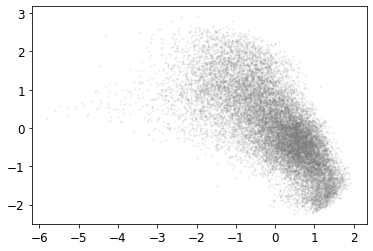

In [4]:
fig, ax = plt.subplots(1,1)
scprep.plot.scatter2d(ds.get_data(), c='Gray', alpha=0.1, ax=ax)

In [5]:
frame_0_start, frame_0_end = np.where(ds.labels == 0)[0][0], np.where(ds.labels == 0)[0][-1]
frame_4_start, frame_4_end = np.where(ds.labels == 4)[0][0], np.where(ds.labels == 4)[0][-1]

In [6]:
X_0_f = ds.get_data()[frame_0_start:frame_0_end]
X_1_f = ds.get_data()[frame_4_start:frame_4_end]

# Subsample terminals
perm_0 = np.random.permutation(np.arange(len(X_0_f)))
perm_1 = np.random.permutation(np.arange(len(X_1_f)))
k = 200

X_0 = torch.tensor(X_0_f[perm_0][:k])
X_1 = torch.tensor(X_1_f[perm_1][:k])

In [7]:
# SDE Solver config
sigma = 0.5
dt = 0.05
N = int(math.ceil(1.0/dt))

# IPFP init config
prior_X_0 = None

# Inducing points approximation config
data_inducing_points = 10
time_inducing_points = N # No time reduction
num_data_points_prior = 50
num_time_points_prior = N

# sparse enables the nystrom method which is just a low rank approximation of the kernel matrix using
# random subsampling, should not affect interpretability much, ive tested it in all our experiments
# works surprisingly well
result = MLE_IPFP(
    X_0,X_1,N=N,sigma=sigma, iteration=2, sparse=True, 
    num_data_points=data_inducing_points, num_time_points=time_inducing_points, prior_X_0=prior_X_0,
    num_data_points_prior=num_data_points_prior, num_time_points_prior=num_time_points_prior
)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:01<00:00, 60.94s/it]


<AxesSubplot:>

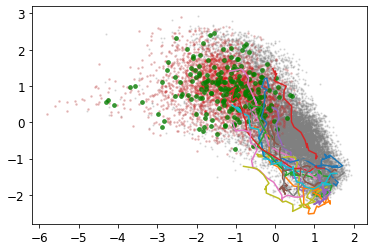

In [24]:
fig, ax = plt.subplots(1,1)
scprep.plot.scatter2d(ds.get_data(), c='Gray', alpha=0.1, ax=ax)
for i in range(20):
    plt.plot(result[-1][1][i,:,0].cpu().detach().numpy(), result[-1][1][i,:,1].cpu().detach().numpy())
scprep.plot.scatter2d(ds.get_data(), c='Gray', alpha=0.1, ax=ax)
scprep.plot.scatter2d(X_1_f, c='Red', alpha=0.1, ax=ax)
scprep.plot.scatter2d(X_1.detach().cpu().numpy(), c='Green', alpha=0.7, ax=ax)

<AxesSubplot:>

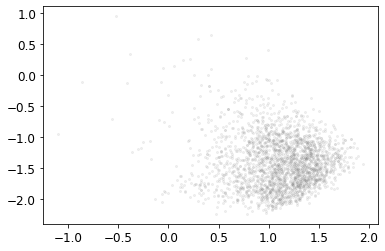

In [14]:
fig, ax = plt.subplots(1,1)
scprep.plot.scatter2d(X_0_f, c='Gray', alpha=0.1, ax=ax)

<AxesSubplot:>

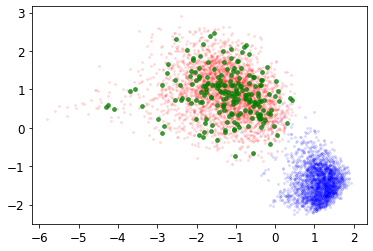

In [22]:
fig, ax = plt.subplots(1,1)
scprep.plot.scatter2d(X_0_f, c='Blue', alpha=0.1, ax=ax)
scprep.plot.scatter2d(X_1_f, c='Red', alpha=0.1, ax=ax)
scprep.plot.scatter2d(X_1.detach().cpu().numpy(), c='Green', alpha=0.7, ax=ax)